# <center>Exploratory Data Analysis - Retail</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9994, 13)

In [32]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [33]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [35]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [36]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [37]:
df.duplicated().sum()

17

In [38]:
df.drop_duplicates(inplace = True)

<AxesSubplot: >

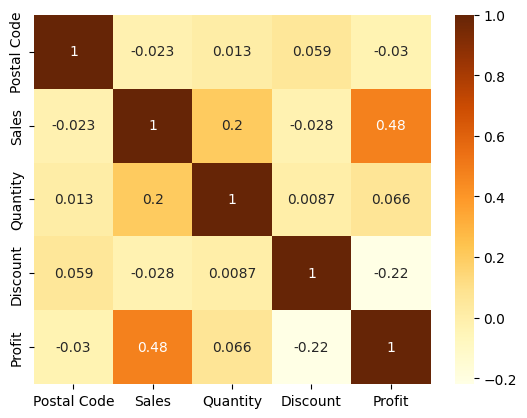

In [39]:
sns.heatmap(df.corr(),annot = True, cmap = 'YlOrBr')

In [40]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [41]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [42]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [43]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot: xlabel='Category'>

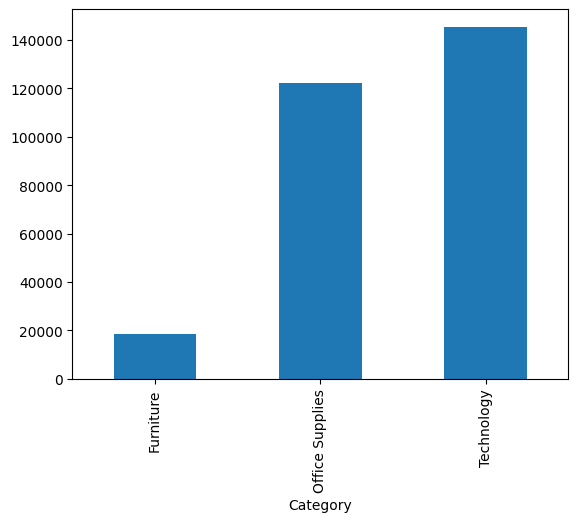

In [44]:
df.groupby('Category').sum()['Profit'].plot(kind = 'bar')

<AxesSubplot: xlabel='Sub-Category'>

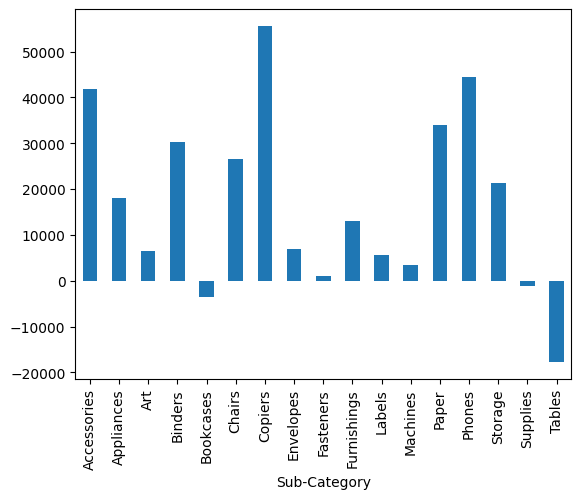

In [45]:
df.groupby('Sub-Category').sum()['Profit'].plot(kind = 'bar')

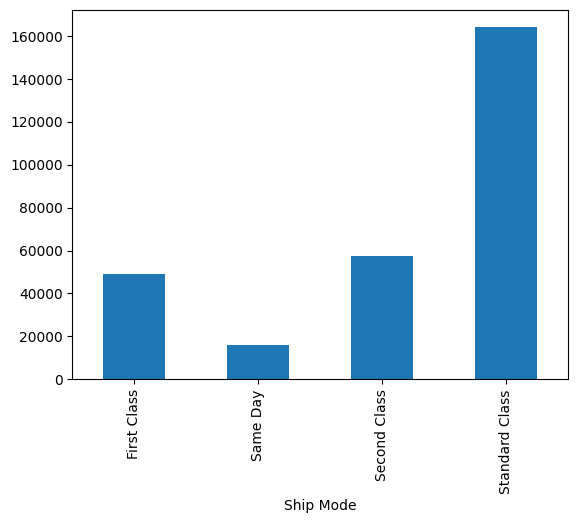

In [106]:
df.groupby('Ship Mode').sum()['Profit'].plot(kind = 'bar')
plt.show()

# Top 5 Products

In [47]:
df['Sub-Category'].head()

0    Bookcases
1       Chairs
2       Labels
3       Tables
4      Storage
Name: Sub-Category, dtype: object

In [48]:
# top5_products = df['Sub-Category'].nlargest(5)

# Bottom 5 Products

In [49]:
df['Sub-Category'].tail()

9989    Furnishings
9990    Furnishings
9991         Phones
9992          Paper
9993     Appliances
Name: Sub-Category, dtype: object

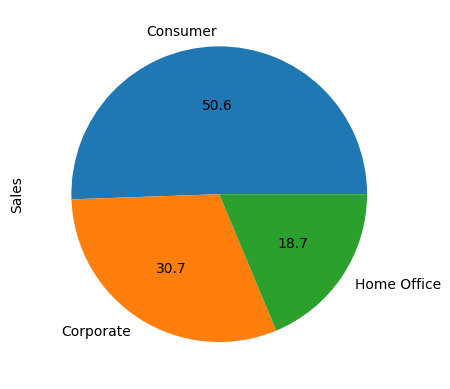

In [50]:
df.groupby('Segment').sum()['Sales'].plot(kind = 'pie',autopct ='%0.1f')
plt.show()

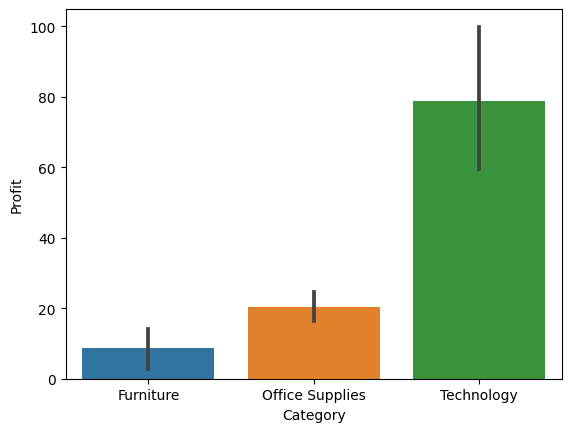

In [66]:
sns.barplot(x = 'Category', y = 'Profit', data = df)
plt.show()

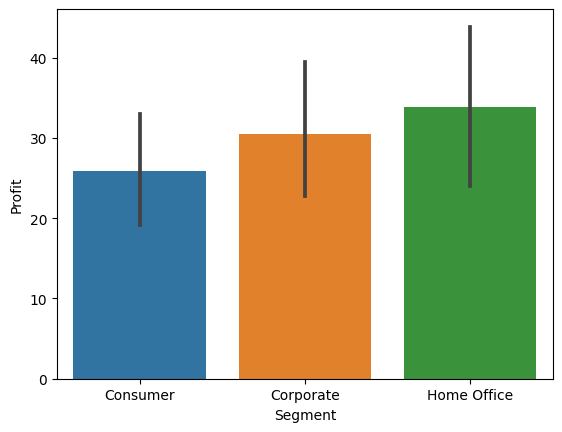

In [68]:
sns.barplot(x = 'Segment', y = 'Profit', data = df)
plt.show()

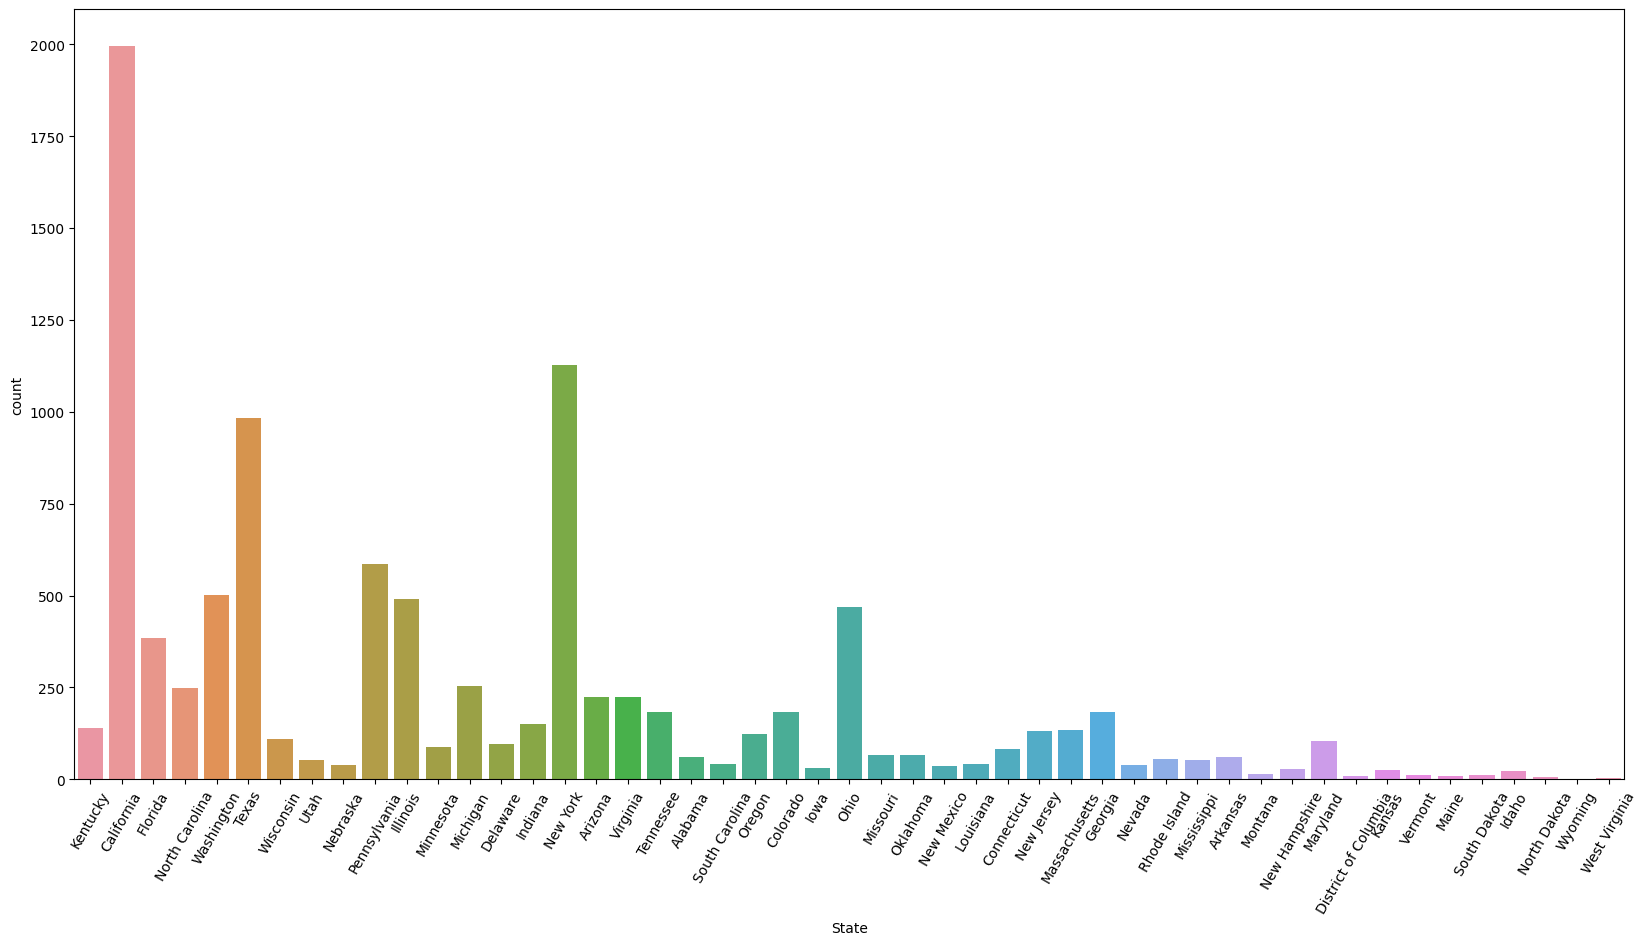

In [76]:
plt.figure(figsize = (20,10))
sns.countplot(x = df['State'])
plt.xticks(rotation = 60)
plt.show()

<AxesSubplot: xlabel='Sales', ylabel='Profit'>

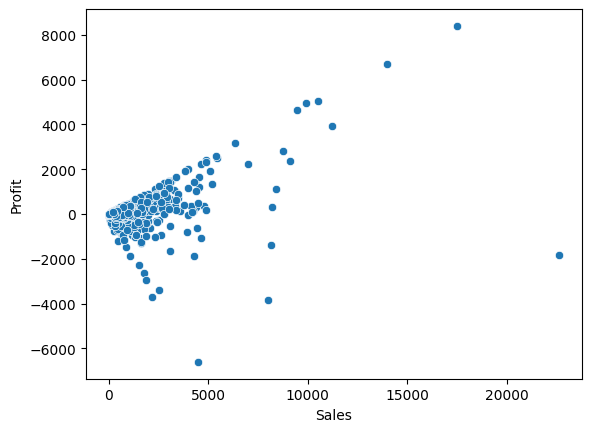

In [77]:
sns.scatterplot(x = df['Sales'],y = df['Profit'], data =df)

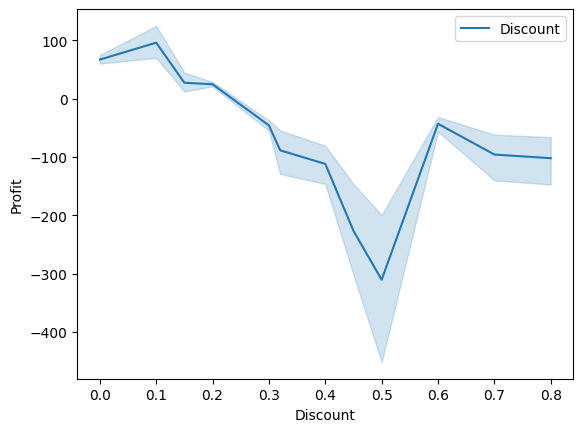

In [85]:
sns.lineplot(x = df['Discount'], y = df['Profit'], data = df, label = 'Discount')
plt.show()

<AxesSubplot: xlabel='Discount', ylabel='Quantity'>

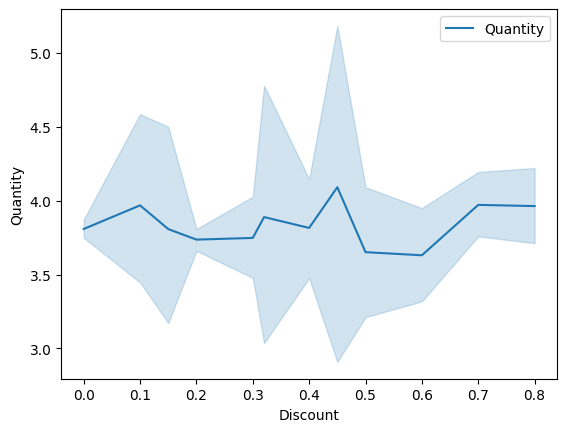

In [89]:
sns.lineplot(x = df['Discount'], y = df['Quantity'], data = df, label = 'Quantity')

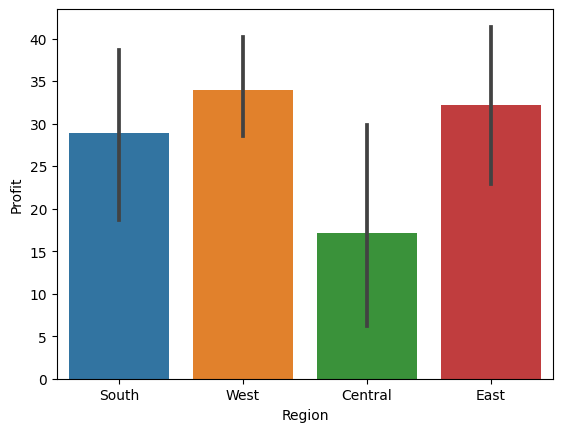

In [96]:
sns.barplot(x = 'Region', y = 'Profit', data =df)
plt.show()

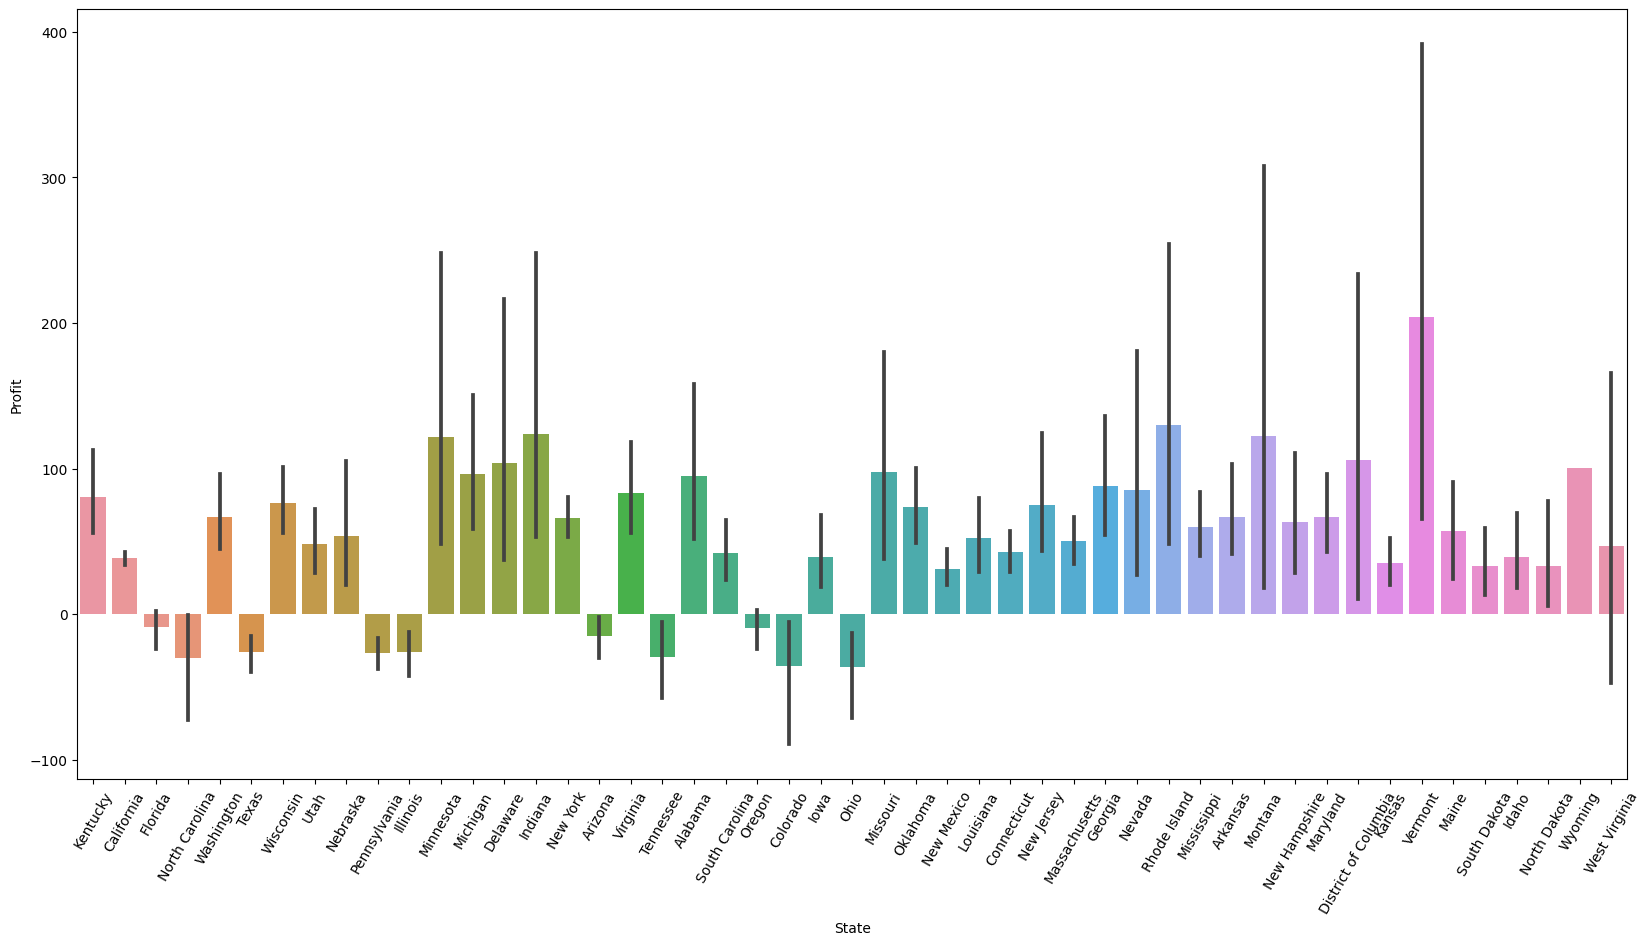

In [105]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'State', y = 'Profit', data = df)
plt.xticks(rotation = 60)
plt.show()

# Not sure

In [111]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

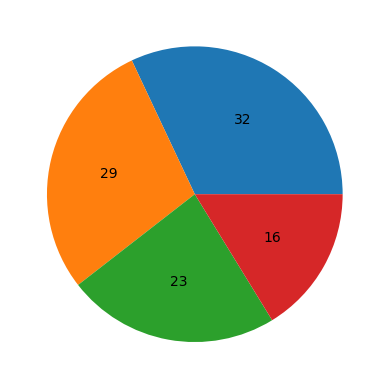

In [117]:
x = df['Region'].value_counts()
plt.pie(x = x, data =df, autopct = '%0.0f')
plt.show()

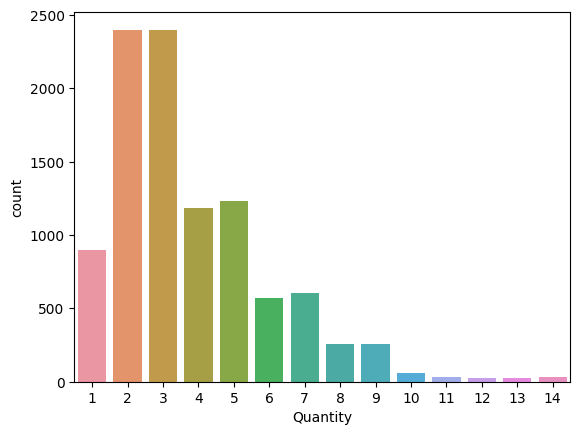

In [121]:
sns.countplot(x = 'Quantity', data = df)
plt.show()